In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

from time import time

import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
sns.set_style("darkgrid")

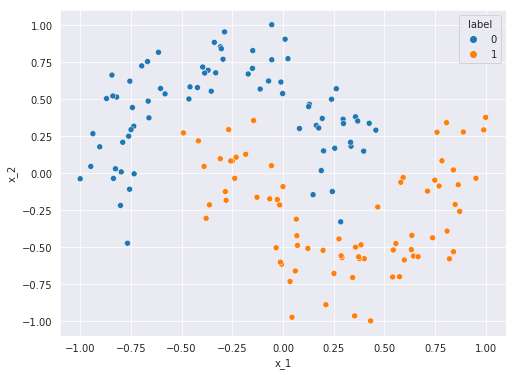

In [2]:
### Moonshape data
X,y = datasets.make_moons(n_samples=150, noise=0.2, random_state=10)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

plt.figure(figsize=(8,6))
data_df = pd.DataFrame(dict(x_1=X[:,0], x_2=X[:,1], label=y))
sns.scatterplot('x_1', 'x_2', data=data_df, hue='label')
plt.show()

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 10,test_size=1/5)

In [3]:
sns.set_style("whitegrid")

def make_meshgrid(x, y, h=0.004):
    xx, yy = np.meshgrid(np.arange(-1.04, 1.04+0.004, h), np.arange(-1.04, 1.04+0.004, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X0, X1 = train_x[:, 0], train_x[:, 1]
xx, yy = make_meshgrid(X0, X1)
meshgrid_features = np.column_stack((xx.ravel(), yy.ravel()))

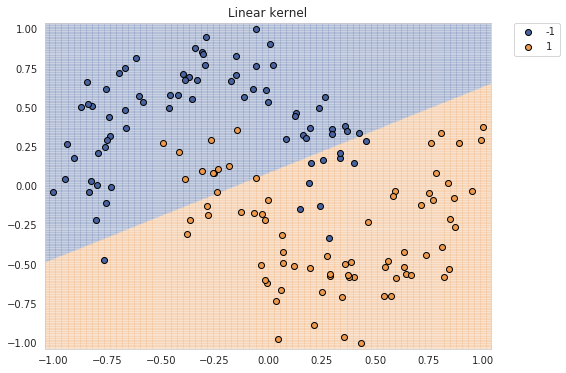

SVM linear test score: 0.7333333333333333


In [4]:
model_svc = SVC(kernel='linear')
svc_l = model_svc.fit(train_x, train_y)
score = model_svc.score(test_x, test_y)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = svc_l.predict(meshgrid_features)

plt.figure(figsize=(8,6))
meshgrid_colors = meshgrid_colors.reshape(xx.shape)
plt.pcolormesh(xx, yy, meshgrid_colors, cmap=cmap, alpha=0.08)

plt.scatter(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    marker="o",
    facecolors="#4863A0",
    edgecolors="k",
    label="-1",)

plt.scatter(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    marker="o",
    facecolors="#EE9A4D",
    edgecolors="k",
    label="1",)

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Linear kernel")
plt.show()

print(f'SVM linear test score: {score}')

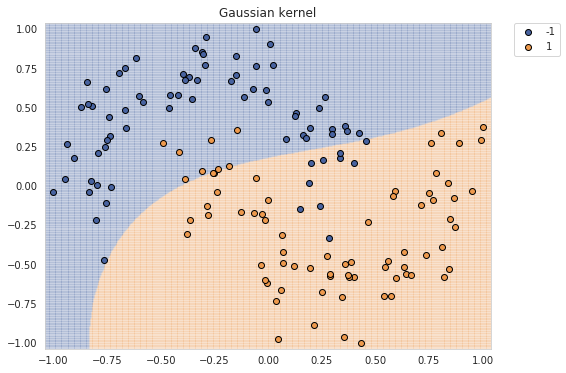

SVM Gaussian test score: 0.7666666666666667


In [5]:
model_svc = SVC(kernel='rbf')
svc_p = model_svc.fit(train_x, train_y)
score = model_svc.score(test_x, test_y)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = svc_p.predict(meshgrid_features)

plt.figure(figsize=(8,6))
meshgrid_colors = meshgrid_colors.reshape(xx.shape)
plt.pcolormesh(xx, yy, meshgrid_colors, cmap=cmap, alpha=0.08)

plt.scatter(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    marker="o",
    facecolors="#4863A0",
    edgecolors="k",
    label="-1",)

plt.scatter(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    marker="o",
    facecolors="#EE9A4D",
    edgecolors="k",
    label="1",)

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Gaussian kernel")
plt.show()

print(f'SVM Gaussian test score: {score}')

### Quantum feature map

In [6]:
from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=128)

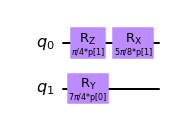

In [7]:
from qiskit.circuit import ParameterVector
p = ParameterVector('p', 2)  

qc = QuantumCircuit(2)

qc.rz((1/4)*np.pi*p[1],0)
qc.rx((5/8)*np.pi*p[1],0)
qc.ry((7/4)*np.pi*p[0],1)

test_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
qc.draw(output="mpl")

In [8]:
model_t = SVC(kernel=test_kernel.evaluate)
qsvm = model_t.fit(train_x, train_y)
q_score = model_t.score(test_x, test_y)

print(f'Test kernel score: {q_score}')

Test kernel score: 1.0


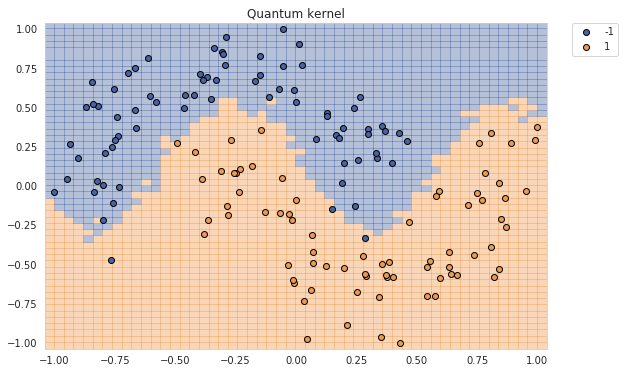

QSVM test score: 1.0
Cost time: 1798.817787 s


In [9]:
GRID = 0.04

def make_big_meshgrid(x, y, h=GRID): 
    xx, yy = np.meshgrid(np.arange(-1.04, 1.04+GRID, h), np.arange(-1.04, 1.04+GRID, h))
    return xx, yy

bbxx, bbyy = make_big_meshgrid(X0, X1)
bbmeshgrid_features = np.column_stack((bbxx.ravel(), bbyy.ravel()))
meshgrid_time1 = time()

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = qsvm.predict(bbmeshgrid_features)

plt.figure(figsize=(9,6))
meshgrid_colors = meshgrid_colors.reshape(bbxx.shape)
plt.pcolormesh(bbxx, bbyy, meshgrid_colors, cmap=cmap, alpha=0.4)

plt.scatter(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    marker="o",
    facecolors="#4863A0",
    edgecolors="k",
    label="-1",)

plt.scatter(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    marker="o",
    facecolors="#EE9A4D",
    edgecolors="k",
    label="1",)

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Quantum kernel")
plt.show()

print(f'QSVM test score: {q_score}')

meshgrid_time2 = time()
print("Cost time: {:3f} s".format(meshgrid_time2-meshgrid_time1))